# グラフ上のノードペアの集合が定める構造について


# 動機

S2同相な形Mの特徴づけをしたい

真ん丸である球面は、球面上のすべての点は、対蹠点を１個持ち、対蹠点以外にはただ１本の最短距離経路が引けて、対蹠点には無数の最短距離経路が引けることを特徴とする。

真ん丸でない形Mの場合には、ある点から複数の最短経路が引ける点は１点とは限らない。
このことを利用して、Mの特徴づけをすることを試みる。

# 準備

## 極遠点

M上の点$u$から$v$への測地線距離を考える。

$u$から任意の$v$の周囲の点への測地線距離が$v$へのそれより短いとき、$v$を$u$の極遠点と定義する。

$u$の極遠点集合を
$$
F_u =\{f_{u,1},...\}
$$
と書くことにする。

$u$が複数の極遠点を持つとき、最も測地線距離が大きいそれを最遠点とする。

$u$の最遠点集合を
$$
\hat{F}_u
$$
と書くことにする。$$\hat{F}_u  \subseteq F_u $$ である。



単位球面S2では、任意の点は極遠点をただ一つ有する($|F_u| = 1$)。それは最遠点である($\hat{F}_u = F_u$)。また、最遠点の最遠点は自身である($\hat{F}_{\hat{F}_u} = u$)。


## 多様体の二乗の空間

$u \in M$と$v \in M$とのペア$(u,v)$の集合を$M^2$と書くことにする。

たとえば、円環$S_1$を考える。$S_1^2$上の点は$((\cos{\theta},\sin{\theta}),(\cos{\phi},\sin{\phi}))$と4次元の点として表せるが、少し工夫すると$(\cos{\theta}(1 + \cos{\phi}),\sin{\theta}(1 + \cos{\phi}),\sin{\phi})$のように3次元上の点としても表すことができる。いわゆるドーナツの形(トーラス)である。
$S_1$上の点は単位複素数の集合としても表せるので、単位複素数のペアとして、$C^2$の部分集合としても表せる。

$S_2^2$の場合には、単位クオータニオンのペアとして$H^2$の部分集合としても表せるだろう。


## 極遠点ペアが構成する多様体

$u \in M$とその極遠点$f_{u,i} \in M$のペア$(u,f_{u,i})$の集合$B$を考える。

$$
\forall u \in M, \forall i \in \{1,..,|F_u|\}, B = \{(u,f_{u,i})\},B \subseteq M^2
$$

$M$が連続で滑らかなとき、$B$も連続で滑らかであると考えられる。

この$B$は$|F_u|$と関係するから、$B$の位相も$|F_u|$と関係している。

たとえば、円環の場合には、すべての$u$の極遠点はただ１つ存在している。それを$S_1^2$上に描けば、トーラス上の環となる。
また、球面の場合には、すべての$u$において極遠点はただ１つ存在している。それが閉じた二次元多様体をなす。

この$B$の位相によって$M$の特徴量とし、$M$を分類することを考える。

余談になるが、対称空間の特徴づけ・分類に対蹠集合を使う方法があるが、対蹠と極遠とに共通点を見出すことにより、対称空間の特徴づけと多様体の形の特徴づけとには、何かしらの関係があるかもしれないと想像する。


## 離散化

多様体$M$上の有限個の点の集合を頂点とするグラフ$G$として得られている場合に、上記の内容を取り扱うこととする。

極遠点は、以下のように定義する。

$G$上の点$u,v$を考える。$u$から$v$への最短グラフ距離$d(u,v)$が、$v$と隣接する任意の点$w$に関して$d(u,v) \ge d(u,v)$であるとき、$v \in F_u$であるとする。

$G$上の2点 $u_1,u_2$が隣接関係にあるとする。
それぞれの極遠点集合 $F_{u_1},F_{u_2}$とする。

$F_{u_1}$のすべての要素は$F_{u_2}$のいずれか１つ以上と隣接関係にあり、
$F_{u_2}$のすべての要素は$F_{u_1}$のいずれか１つ以上と隣接関係にあることは
$G$が連続で滑らかな$M$の離散表現であることから要請される。

2つの集合$F_{u_1},F_{u_2}$の要素対応を$S=S(u_1,u_2) = \{f_{u_1,s_1},f_{u_2,s_2}\},s_1 \in \{1,...,|F_{u_1}|\},,s_2 \in \{1,...,|F_{u_2}|\}$ と表すこととする。

どの要素対応が、実際の対応とするかは以下のように定めることとする。
$$
\hat{s}=argmin_{S} (\sum_{s \in S} d(f_{u_1,s_1},f_{u_2,s_2}))
$$

今、$G$の頂点の次数がすべて等しいとすると、$S$は次数の数のペアとなる。

# Rで実装

$S$の簡便性から、斉次数グラフを考える。
実際、S2同相3次元オブジェクトの場合には、三角化グラフを作成し、その双対グラフを取れば、すべての次数が3であるようなグラフとできる。

## 極遠点の検出

In [1]:
library(rgl) # package for 3d object handling
library(igraph) # package for graph theory
# reading the bunny_200.obj 
bunny <- readOBJ("bunny_200.obj")
# 3D coordinates of vertices in the shape of n x 3 matrix
V.xyz <- t(bunny[[1]][1:3,])
# 三角形の重心座標
Face.x <- matrix(V.xyz[bunny[[2]],1],ncol=3)
Face.y <- matrix(V.xyz[bunny[[2]],2],ncol=3)
Face.z <- matrix(V.xyz[bunny[[2]],3],ncol=3)
Face.xyz <- cbind(apply(Face.x,1,mean),apply(Face.y,1,mean),apply(Face.z,1,mean))
# Enumerate edges of triangle in n x 2 matrix shape
Edges <- rbind(t(bunny[[2]][1:2,]),t(bunny[[2]][2:3,]),t(bunny[[2]][c(3,1),]))
Edges <- t(apply(Edges,1,sort))
# Remove duplicates of edges
Edges <- unique(Edges)
# エッジを共有する三角形ペアの列挙
Edges <- t(apply(Edges,1,sort))
bunny2. <- apply(bunny[[2]],2,sort)
E1 <- bunny2.[1:2,]
E2 <- bunny2.[2:3,]
E3 <- bunny2.[c(1,3),]
Edges.face <- Edges
for(i in 1:length(Edges[,1])){
    E1. <- E1 - Edges[i,]
    E2. <- E2 - Edges[i,]
    E3. <- E3 - Edges[i,]
    tmp1 <- apply(E1.^2,2,sum)
    tmp2 <- apply(E2.^2,2,sum)
    tmp3 <- apply(E3.^2,2,sum)
    tmp4 <- tmp1 * tmp2 * tmp3
    tmp5 <- which(tmp4==0)
    #print(length(tmp5))
    Edges.face[i,] <- tmp5
}
# length of edges.face
Edge.face.len <- sqrt(apply((Face.xyz[Edges.face[,1],] - Face.xyz[Edges.face[,2],])^2,1,sum))
# length of edges
Edge.len <- sqrt(apply((V.xyz[Edges[,1],] - V.xyz[Edges[,2],])^2,1,sum))
g.face <- graph.edgelist(Edges.face,directed=FALSE)
# make a graph object
g <- graph.edgelist(Edges,directed=FALSE)
# distance on the graph
d <- distances(g,weights=Edge.len)
d.face <- distances(g.face,weights=Edge.face.len)
# 隣接ノード
adj.v <- adjacent_vertices(g,1:length(V(g)))
adj.v.face <- adjacent_vertices(g.face,1:length(V(g.face)))
#degree(g.face)

Warning message:
"package 'rgl' was built under R version 3.4.1"
Attaching package: 'igraph'

The following object is masked from 'package:rgl':

    %>%

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
# 極遠点検出関数
my.Far <- function(d,adj.v){
    n <- length(adj.v)
    ret <- matrix(0,n,n)
    for(i in 1:n){
        tmp <- d[,adj.v[[i]]]
        tmp2 <- apply(tmp < d[,i],1,prod)
        ret[which(tmp2==1),i] <- 1
    }
    return(ret)
}

In [3]:
#lapply(adj.v,length)
fars <- my.Far(d,adj.v)
fars.face <- my.Far(d.face,adj.v.face)

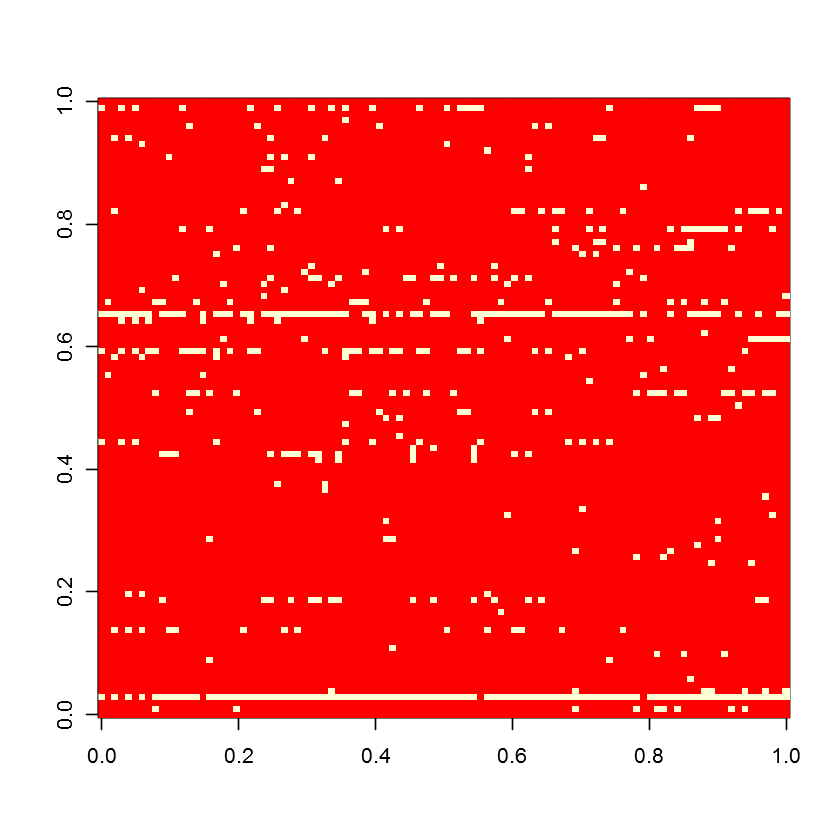

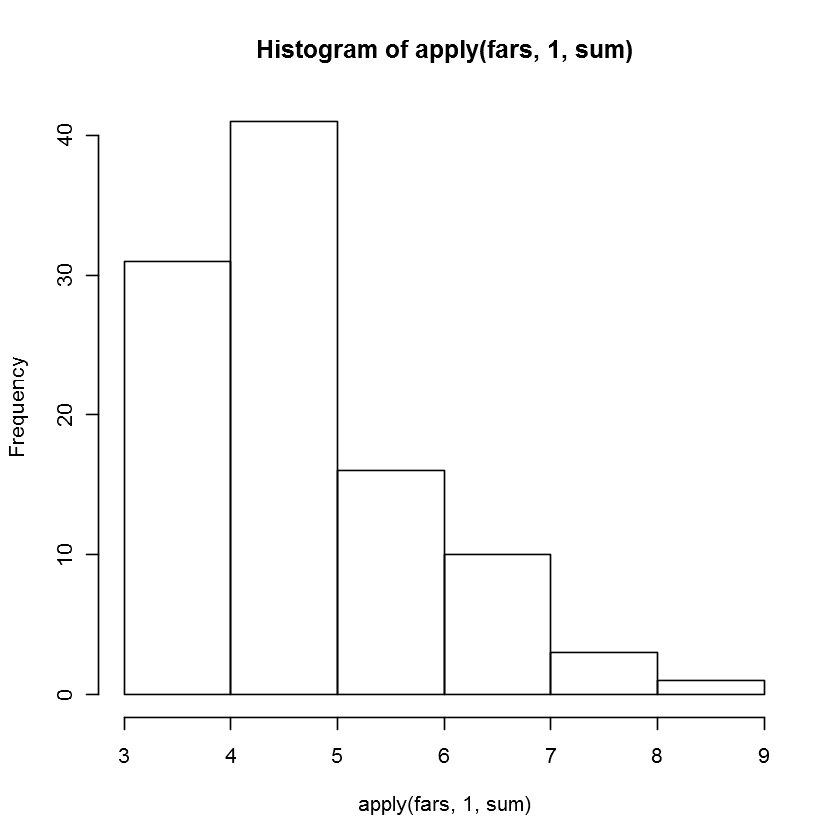

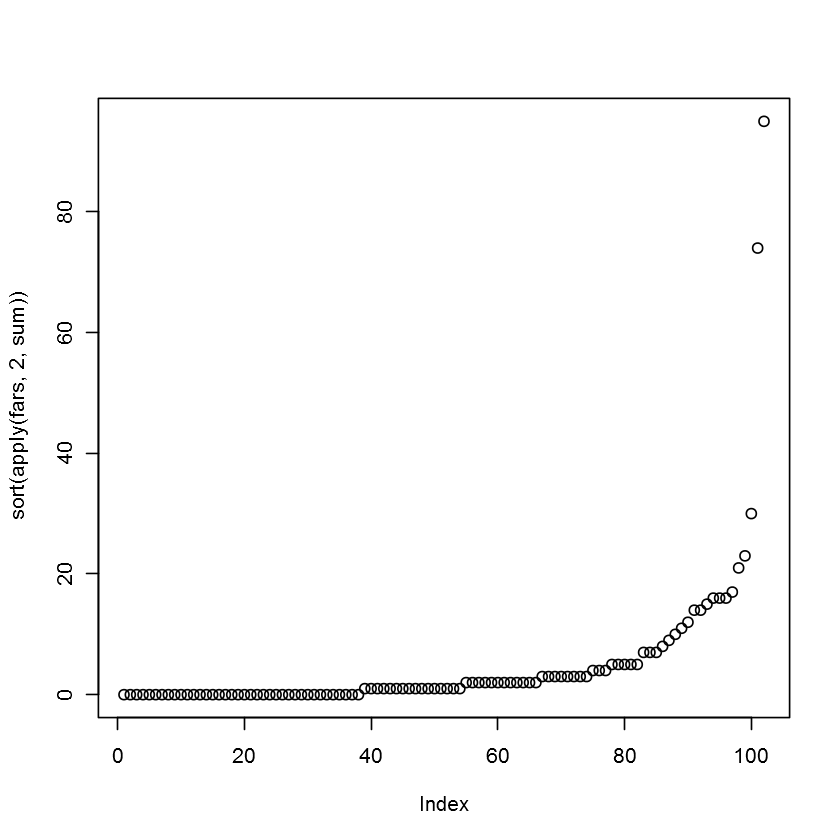

In [15]:
image(fars)
hist(apply(fars,1,sum))
plot(sort(apply(fars,2,sum)))

## (点,極遠点)ペアとその隣接関係の列挙

### ペア作成
n個の要素とm個の要素があり、その$n \times m$ペアの距離が与えられていたとき、ペアを作る。
n個のそれぞれから、m個側の最短のそれとペアを組み
m個のそれぞれから、n個側の最短のそれとペアを組むことにする。


In [5]:
my.minPair <- function(d){
    n <- length(d[,1])
    m <- length(d[1,])
    tmp <- t(apply(d,1,order))
    tmp2 <- apply(d,2,order)
    tmp.pair <- rbind(cbind(1:n,tmp[,1]),cbind(tmp2[1,],1:m))
    #tmp.pair <- t(apply(tmp.pair,1,sort))
    tmp.pair <- unique(tmp.pair)
    return(tmp.pair)
}
tmp.d <- matrix(c(1,2,3,4,5,6),ncol=3)
my.minPair(tmp.d)

1,1
2,1
1,2
1,3


### 隣接関係列挙

オリジナルのグラフのエッジごとに、(点,極遠点)集合間にペアを作る。

In [6]:
# el: 元のグラフのエッジリスト
# x: 元のグラフの頂点座標
# fars: 極遠点情報行列

my.dist.pair <- function(X1,X2){
    L1 <- apply(X1^2,1,sum)
    L2 <- apply(X2^2,1,sum)
    IP <- X1 %*% t(X2)
    tmp <- outer(L1,L2,"+") - 2 * IP
    tmp[which(tmp < 0)] <- 0
    sqrt(tmp)
}

my.farManifold <- function(fars,el,x){
    # 頂点ペア(新たな多様体グラフの頂点になる)
    V <- which(fars==1,arr.ind=TRUE)
    n.el <- length(el[,1])
    ret <- matrix(0,0,4)
    ncol <- length(x[1,])
    for(i in 1:n.el){
        f1 <- which(fars[el[i,1],]==1)
        f2 <- which(fars[el[i,2],]==1)
        #F1 <- cbind(rep(el[i,1],length(f1)),f1)
        #F2 <- cbind(rep(el[i,2],length(f2)),f2)
        #X1 <- cbind(x[F1[,1],],x[F1[,2],])
        #X2 <- cbind(x[F2[,1],],x[F2[,2],])
        X1 <- matrix(x[f1,],ncol=ncol)
        X2 <- matrix(x[f2,],ncol=ncol)
        
        tmp <- my.dist.pair(X1,X2)
        tmp2 <- my.minPair(tmp)
        n.pair <- length(tmp2[,1])
        ret <- rbind(ret,cbind(rep(el[i,1],n.pair),tmp2[,1],rep(el[i,2],n.pair),tmp2[,2]))
    }
    return(list(V=V,E=ret))
}

In [7]:
el <- Edges
x <- V.xyz
out <- my.farManifold(fars,el,x)

### (点,極遠点)ペアをノードとするグラフ

$M^2$空間に、(点,極遠点)ペアがその隣接関係とともに取り出された。

(点,極遠点)ペアを$M^2$空間のノードであるとして、この多様体をグラフとして取り出すことにする。

In [8]:
# V は(点,極遠点)ペア
# E はV のペア((点,極遠点)ペア,(点,極遠点)ペア)
my.graphM2 <- function(V,E){
    nv <- max(V)
    new.V.id <- (V[,1]-1) * nv + V[,2]
    new.E.id <- cbind(paste("",(E[,1]-1) * nv + E[,2]), paste("",(E[,3]-1) * nv + E[,4]))
    new.g <- graph.edgelist(new.E.id,directed=FALSE)
    return(list(g=new.g,vid = new.V.id,eid=new.E.id))
}

In [9]:
graphM2 <- my.graphM2(out$V,out$E)

In [10]:
# V は(点,極遠点)ペア
# x はオリジナルグラフのノード座標
my.coordsM2 <- function(V,x){
    cbind(x[V[,1],],x[V[,2],])
}

In [11]:
is.connected(graphM2$g)

[1] TRUE

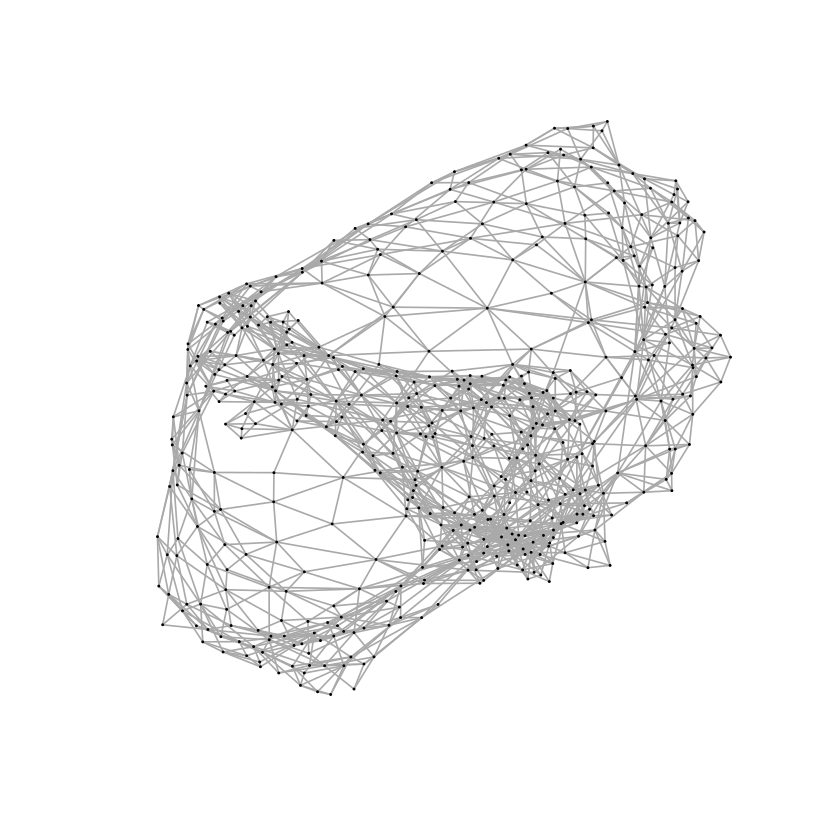

In [12]:
plot(graphM2$g,vertex.size=0.1,vertex.label=NA)